In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit
import numpy as np

# Scenario 1: Logistic Curve max 44%

1a) Adoption rate projection for the 19.3M PBB eligible households universe based on Rosenworcel's letter indicating that 16% of ACP recipients had been previously unconnected as of Nov 2022, and that figure increased to 20% by July 2023. Using enrollment totals for those months and our estimate of 17.7M unconnected/ACP-eligible households, those figures translate to 13.6% and 22.39% adoption rates for the unconnected (respectively). 

Using those and a 0% adoption rate to start the program in May 2021, I'll fit a logistic curve that approaches a horizontal asymptote at 44% adoption (based on the max ACP adoption rate) over time.


In [2]:
#set up logistic curve
def logistic_func(x, L, k, x_0):
    return L / (1 + np.exp(-k * (x - x_0)))

#feed in points to fit around
months = np.array([1, 19, 27])  # 1 for May 2021, 19 for Nov 2022, 27 for Jul 2023
percentages = np.array([0, 13.6, 22.39])  # The corresponding percentages


# Perform the curve fitting with fixed L=44
try:
    params, covariance = curve_fit(lambda x, k, x_0: logistic_func(x, 44, k, x_0), months, percentages, p0=[0.1, 10])
    fit_success = True
except RuntimeError as e:
    print(f"Curve fitting failed: {e}")
    fit_success = False

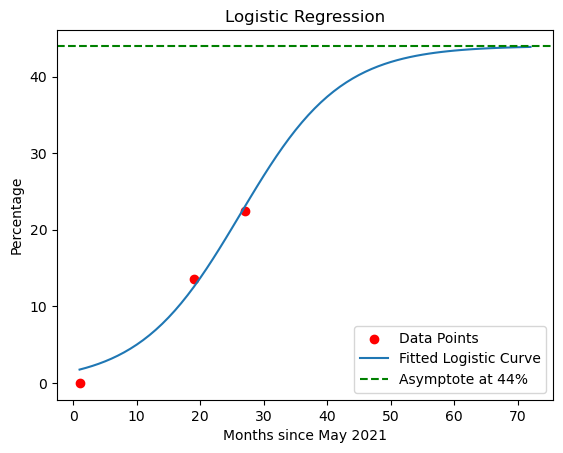

In [3]:
##Create x_vals and y_vals to plot

#x values are months since May 2021. 72 months gives us 6 years
x_vals = np.linspace(1, 72, 72)  
#y_values give us the predicted adoption rate in that month
y_vals = logistic_func(x_vals, 44, *params)

# Plotting to visualize the adoption rates over 72 months. 
plt.scatter(months, percentages, color='red', label='Data Points')
plt.plot(x_vals, y_vals, label='Fitted Logistic Curve')
plt.axhline(y=44, color='green', linestyle='--', label='Asymptote at 44%')
plt.xlabel('Months since May 2021')
plt.ylabel('Percentage')
plt.title('Logistic Regression')
plt.legend()
plt.show()

In [4]:
#store these in a dataframe (S1)
S1 = pd.DataFrame({
    'months': x_vals,
    'adoption_rate': y_vals})

#enrolled households found by multiplying the adoption rate by the eligible households (19.3M)
S1['enrolled_hh'] = S1['adoption_rate']/100*19323551
#Cost of the program, per month, 6.85% of the enrolled households by $75 because that is the percentage of 
#eligible households in High Cost deployed areas, then the remaining 93.15% by $30
S1['cost'] = S1['enrolled_hh']*(0.0685*75+0.9315*30)
S1.head()

,months,adoption_rate,enrolled_hh,cost
0,1.0,1.740934,336410.279998,1.112929e+07
1,2.0,1.964501,379611.401939,1.255849e+07
2,3.0,2.215273,428069.501174,1.416161e+07
3,4.0,2.496156,482346.042806,1.595721e+07
4,5.0,2.810258,543041.662909,1.796518e+07


In [5]:
S1.to_csv('/Users/mhamburger94/ESH/Projects/PBB/S1_pbb_cost.csv', index=False)

# Scenario 2) Logistic Curve max 63%

UPDATE: I didn't end up using this scenario in the graph because it ended up being way too expensive and it's probably not realistic that unconnected households would adopt PBB at 63%.

Using 13.6% in Nov 2022 and 22.39% in Jul 2023, fit a logistic curve set to hit a horizontal asymptote at 63%. This is the same as scenario 1, except that it approaches 63% (SNAP) instead of 44% (ACP).

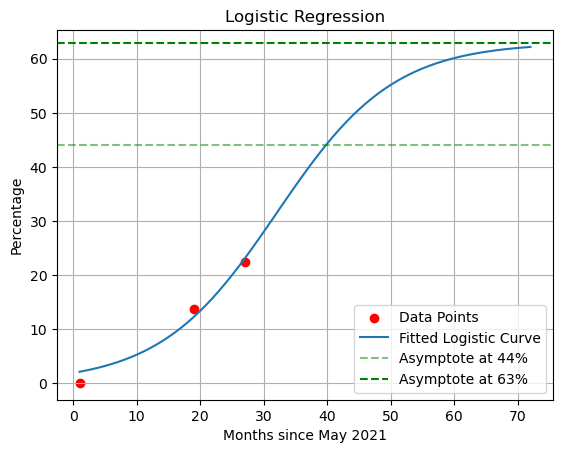

In [6]:
#Fit the Logistic Function
# Initial guess for parameters: L, k, x_0
initial_guess = [63, 0.1, 10]

# Perform the curve fitting with fixed L=63
try:
    params, covariance = curve_fit(lambda x, k, x_0: logistic_func(x, 63, k, x_0), months, percentages, p0=[0.1, 10])
    fit_success = True
except RuntimeError as e:
    print(f"Curve fitting failed: {e}")
    fit_success = False

#Create x and y values for Scenario 2 and plot    
#x values are months since May 2021. 72 months gives us 6 years
x_vals_h = np.linspace(1, 72, 72)  
#y_values give us the predicted adoption rate in that month
y_vals_h = logistic_func(x_vals_h, 63, *params)

# Plotting
plt.scatter(months, percentages, color='red', label='Data Points')
plt.plot(x_vals_h, y_vals_h, label='Fitted Logistic Curve')
plt.axhline(y=44, color='green', alpha = 0.5, linestyle='--', label='Asymptote at 44%')
plt.axhline(y=63, color='green', linestyle='--', label='Asymptote at 63%')
plt.xlabel('Months since May 2021')
plt.ylabel('Percentage')
plt.title('Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
#store Scenario 2 Adoption Rates as a dataframe
S2 = pd.DataFrame(
            {'months': x_vals_h,
            'adoption_rate': y_vals_h})

#enrolled households found by multiplying the adoption rate by the eligible households (19.3M)
S2['enrolled_hh'] = S2['adoption_rate']/100*19323551
#Cost of the program, per month, 6.85% of the enrolled households by $75 because that is the percentage of 
#eligible households in High Cost deployed areas, then the remaining 93.15% by $30
S2['cost'] = S2['enrolled_hh']*(0.0685*75+0.9315*30)
S2.head()

,months,adoption_rate,enrolled_hh,cost
0,1.0,2.068229,399655.326137,1.322160e+07
1,2.0,2.297514,443961.333785,1.468735e+07
2,3.0,2.551154,492973.477863,1.630880e+07
3,4.0,2.831488,547144.042531,1.810089e+07
4,5.0,3.141026,606957.853958,2.007968e+07


In [8]:
S2.to_csv('/Users/mhamburger94/ESH/Projects/PBB/S2_pbb_cost.csv', index=False)

# Scenario 3) Approach Lifeline adoption rate logistically

This is meant to capture the low-end scenario, in which PBB gradually works its way up towards Lifeline's adoption rate (20.22%, Lifeline's current adoption rate as of Aug 2024).

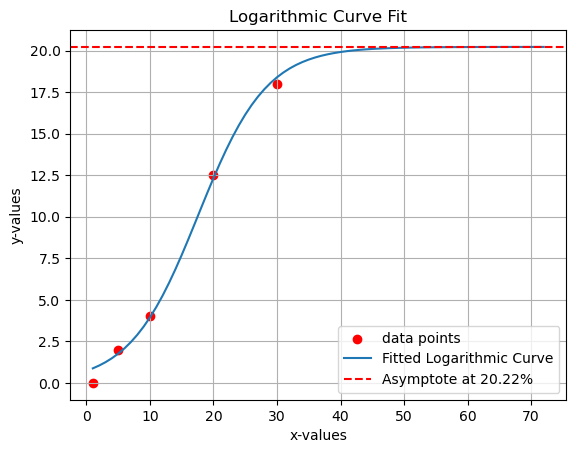

In [5]:
# Perform the curve fitting with fixed L=23.21
m = np.array([1, 5, 10, 20, 30])
p = np.array([0, 2, 4, 12.5, 18 ])
try:
    params, covariance = curve_fit(lambda x, k, x_0: logistic_func(x, 20.22, k, x_0), m, p, p0=[0.1, 10])
    fit_success = True
except RuntimeError as e:
    print(f"Curve fitting failed: {e}")

x_values = np.arange(1, 73)
y_values = logistic_func(x_values, 20.22, *params)
    
# Plotting the curve
plt.scatter(m,p,color='red',label='data points')
plt.plot(x_values, y_values, label='Fitted Logarithmic Curve')
plt.axhline(y=20.22, color='r', linestyle='--', label='Asymptote at 20.22%')
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.title('Logarithmic Curve Fit')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
S3 = pd.DataFrame({
    'months': x_values,
    'adoption_rate': y_values
})
#enrolled households found by multiplying the adoption rate by the eligible households (19.3M)
S3['enrolled_hh'] = S3['adoption_rate']/100*19323551
#Cost of the program, per month, 6.85% of the enrolled households by $75 because that is the percentage of 
#eligible households in High Cost deployed areas, then the remaining 93.15% by $30
S3['cost'] = S3['enrolled_hh']*(0.0685*75+0.9315*30)
S3.head()

,months,adoption_rate,enrolled_hh,cost
0,1,0.876927,169453.363112,5.605941e+06
1,2,1.047195,202355.277895,6.694418e+06
2,3,1.248390,241233.289997,7.980600e+06
3,4,1.485246,287002.200071,9.494750e+06
4,5,1.762864,340647.894229,1.126948e+07


In [11]:
S3.to_csv('/Users/mhamburger94/ESH/Projects/PBB/S3_pbb_cost.csv', index=False)

# Prep Scenarios to be plotted on a line graph

Note: Scenario 2 is far too expensive and probably unrealistic, so I'm not including it on the graph. Instead, I'm using Scenario 1 (approaching 44% over time) as the "High Estimate" and Scenario 3 (approaching 23% over time) as the "Low Estimate". 

The following consolidates the data I need into one dataframe and then plots the projected costs on top of the stacked bar chart representing available funds within High Cost.

In [7]:
S1.rename(columns={'adoption_rate':'S1_adoption_rate',
                  'enrolled_hh':'S1_enrolled_hh',
                  'cost':'S1_cost'}, inplace=True)

S3.rename(columns={'adoption_rate':'S3_adoption_rate',
                  'enrolled_hh':'S3_enrolled_hh',
                  'cost':'S3_cost'}, inplace=True)
dfm = S1.merge(S3, how='left', on='months')
dfm.head()

,months,S1_adoption_rate,S1_enrolled_hh,S1_cost,S3_adoption_rate,S3_enrolled_hh,S3_cost
0,1.0,1.740934,336410.279998,1.112929e+07,0.876927,169453.363112,5.605941e+06
1,2.0,1.964501,379611.401939,1.255849e+07,1.047195,202355.277895,6.694418e+06
2,3.0,2.215273,428069.501174,1.416161e+07,1.248390,241233.289997,7.980600e+06
3,4.0,2.496156,482346.042806,1.595721e+07,1.485246,287002.200071,9.494750e+06
4,5.0,2.810258,543041.662909,1.796518e+07,1.762864,340647.894229,1.126948e+07


In [8]:
##this creates a new dataframe that has the total costs and adotpion rates by year rather than by month. This 
##aligns with the projected budgets for High Cost

# Create a 'year' column to group by years (months 1-12 -> year 1, months 13-24 -> year 2, etc.)
dfm['year'] = ((dfm['months'] - 1) // 12) + 1

# Aggregate data by 'year'
dfy = dfm.groupby('year').agg({
    'S1_cost': 'sum',
    'S3_cost':'sum',
    'S1_adoption_rate': 'max',
    'S1_enrolled_hh': 'max', 
    'S3_adoption_rate': 'max',
    'S3_enrolled_hh': 'max'
}).reset_index()

# Display the resulting dfy
dfy

,year,S1_cost,S3_cost,S1_adoption_rate,S1_enrolled_hh,S3_adoption_rate,S3_enrolled_hh
0,1.0,2.762130e+08,1.983591e+08,6.230392,1.203933e+06,5.262953,1.016989e+06
1,2.0,9.473538e+08,8.340445e+08,18.847114,3.641932e+06,15.507028,2.996508e+06
2,3.0,2.107229e+09,1.401915e+09,34.008223,6.571596e+06,19.583488,3.784225e+06
3,4.0,2.963696e+09,1.533098e+09,41.326945,7.985833e+06,20.149961,3.893688e+06
4,5.0,3.273548e+09,1.549172e+09,43.382264,8.382994e+06,20.212487,3.905770e+06
5,6.0,3.352303e+09,1.550919e+09,43.862501,8.475793e+06,20.219196,3.907067e+06


# Bar Graph

In [9]:
##Data on projected High Cost Budget through 2032
#Note the High Cost Fund data was copied and pasted from the Data for PBB spreadsheet

years = [2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031]

# Committed Funds and Potential for Reallocation data
committed_funds = [
    4629464191.22, 3655016800.22, 3655016800.22, 2952943020.53, 2952943020.53,
    2809858316.72, 2809858316.72, 2170712310.72
]

potential_reallocation = [
    0.00, 974447391.00, 974447391.00, 1676521170.69, 1676521170.69,
    1819605874.50, 1819605874.50, 2458751880.50
]

low_estimate = dfy['S3_cost'].tolist()
low_estimate = [None, None] + low_estimate

high_estimate = dfy['S1_cost'].to_list()
high_estimate = [None, None] + high_estimate
high_estimate

[None,
 None,
 276212973.8912624,
 947353777.0960604,
 2107229416.3766665,
 2963695807.0261097,
 3273548037.9759417,
 3352303388.403144]

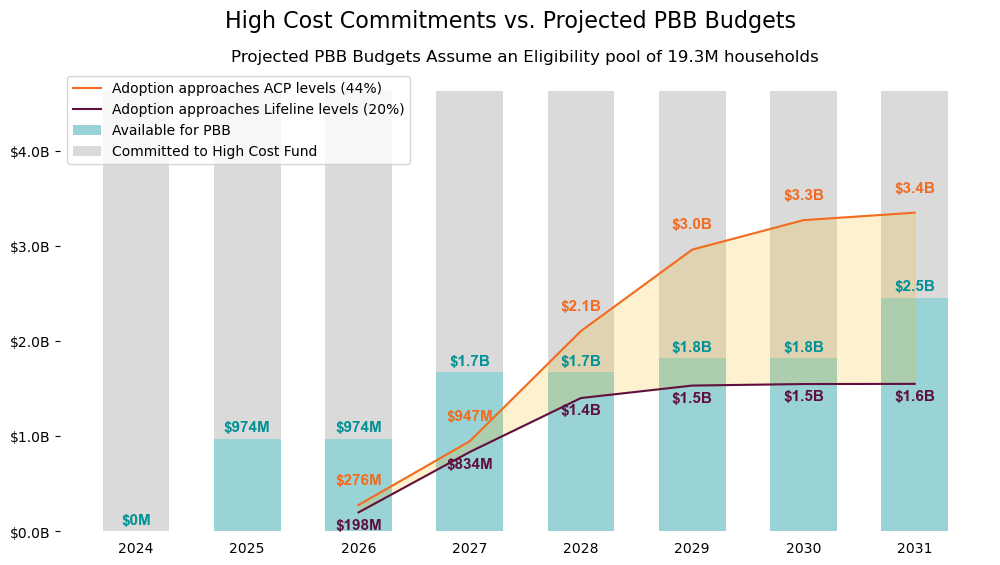

In [13]:
# Plotting
fig, ax1 = plt.subplots(figsize=(12,6))

# Stacked bar chart
bar_width = 0.6
bars1 = plt.bar(years, potential_reallocation, color='#009296',alpha=0.4, width=bar_width, label='Available for PBB')
bars2 = plt.bar(years, committed_funds, bottom=potential_reallocation, color='#4a4a4a',alpha=0.2, width=bar_width, label='Committed to High Cost Fund')

# Line charts
# Line charts, using np.nan for None values
pbb_scenario_1 = [np.nan if v is None else v for v in low_estimate]
pbb_scenario_2 = [np.nan if v is None else v for v in high_estimate]

ax1.plot(years, pbb_scenario_2, color='#F26B21', label='Adoption approaches ACP levels (44%)')
ax1.plot(years, pbb_scenario_1, color='#5F0F40', label='Adoption approaches Lifeline levels (20%)')


#fill in between lines
ax1.fill_between(years, pbb_scenario_1,  pbb_scenario_2, color = '#FDB913', alpha = 0.2)

# Add data labels
for i, txt in enumerate(pbb_scenario_1):
    if not np.isnan(txt):
        label = f"${txt/1e9:.1f}B" if txt >= 1e9 else f"${txt/1e6:.0f}M"
        ax1.annotate(label, (years[i], pbb_scenario_1[i]), textcoords="offset points", xytext=(0,-12), ha='center', 
                     fontsize=11, weight='bold', fontname = 'Arial', color = '#5F0F40')

for i, txt in enumerate(pbb_scenario_2):
    if not np.isnan(txt):
        label = f"${txt/1e9:.1f}B" if txt >= 1e9 else f"${txt/1e6:.0f}M"
        ax1.annotate(label, (years[i], pbb_scenario_2[i]), textcoords="offset points", xytext=(0,15), ha='center', 
                     fontsize=11, weight='bold', fontname = 'Arial', color = '#F26B21')

for i, txt in enumerate(potential_reallocation):
    if not np.isnan(txt):
        label = f"${txt/1e9:.1f}B" if txt >= 1e9 else f"${txt/1e6:.0f}M"
        ax1.annotate(label, (years[i], potential_reallocation[i]), textcoords="offset points", xytext=(0,5), ha='center', 
                     fontsize=11, weight='bold', fontname = 'Arial', color = '#009296')

# Labels and title

# Define a function to format the y-axis labels
def billions(x, pos):
    # Format number in billions
    return f'${x * 1e-9:.1f}B'
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(billions))

plt.suptitle('High Cost Commitments vs. Projected PBB Budgets', size=16)
plt.title('Projected PBB Budgets Assume an Eligibility pool of 19.3M households', size=12)
#plt.grid(axis='y')

#label years, but remove tick marks.
plt.xticks(years)
ax1.tick_params(axis='both', which='both', bottom=False)

plt.legend(loc='upper left', prop={'size': 10})
#remove frame
plt.box(False)

#add anntoations UPDATE: no longer need annotation for RDOF and EACAM ending
#ax1.annotate('RDOF Funds Expire',
#             xy=(2031, potential_reallocation[years.index(2031)]),
#             xytext=(-20,18),  # Offset the text above the point
#             textcoords='offset points',
#             ha='center', fontsize=10, color='#009296', fontweight='bold',
#            arrowprops=dict(facecolor='#009296', width = 4, headwidth=10, headlength=4))
# Display the plot
plt.show()

# Anticipating Follow Up Questions

What do these numbers look like if we use 16.3M for the eligible universe instead?

In [18]:
#High Enrollment Scenario for 16.3M
S1_16 = pd.DataFrame({
    'months': x_vals,
    'adoption_rate_S1': y_vals})
#Using 16.3M instead of 19.3M
S1_16['enrolled_hh_S1'] = S1_16['adoption_rate_S1']/100*16323551
#Still include High Cost $75 benefit
S1_16['cost_S1'] = S1_16['enrolled_hh_S1']*(0.0685*75+0.9315*30)

##Low Enrollment Scenario fo 16.3M
S3_16 = pd.DataFrame({
    'months': x_values,
    'adoption_rate_S3': y_values
    })
#Using 16.3M instead of 19.3M
S3_16['enrolled_hh_S3'] = S3_16['adoption_rate_S3']/100*16323551
#Still include High Cost $75 benefit
S3_16['cost_S3'] = S3_16['enrolled_hh_S3']*(0.0685*75+0.9315*30)

#Merge them
dfm_16 = S1_16.merge(S3_16, how = 'left', on = 'months')
# Create a 'year' column to group by years (months 1-12 -> year 1, months 13-24 -> year 2, etc.)
dfm_16['year'] = ((dfm_16['months'] - 1) // 12) + 1

# Aggregate data by 'year'
dfy_16 = dfm_16.groupby('year').agg({
    'cost_S1': 'sum',
    'cost_S3':'sum',
    'adoption_rate_S1': 'max',
    'enrolled_hh_S1': 'max', 
    'adoption_rate_S3': 'max',
    'enrolled_hh_S3': 'max'
}).reset_index()

# Display the resulting dfy
dfy_16

,year,cost_S1,cost_S3,adoption_rate_S1,enrolled_hh_S1,adoption_rate_S3,enrolled_hh_S3
0,1.0,2.333306e+08,1.675636e+08,6.230392,1.017021e+06,5.262953,8.591008e+05
1,2.0,8.002762e+08,7.045583e+08,18.847114,3.076518e+06,15.507028,2.531298e+06
2,3.0,1.780080e+09,1.184266e+09,34.008223,5.551350e+06,19.583488,3.196721e+06
3,4.0,2.503579e+09,1.295083e+09,41.326945,6.746025e+06,20.149961,3.289189e+06
4,5.0,2.765327e+09,1.308662e+09,43.382264,7.081526e+06,20.212487,3.299396e+06
5,6.0,2.831855e+09,1.310137e+09,43.862501,7.159918e+06,20.219196,3.300491e+06


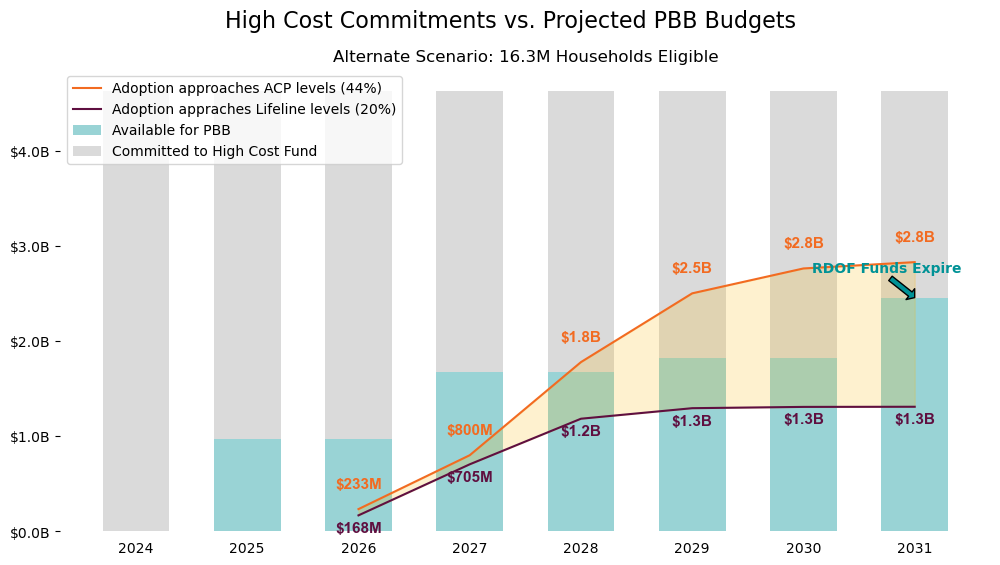

In [19]:
#create arrays to plot 16.3M scenarios over bar graph
low = dfy_16['cost_S3'].tolist()
low = [None, None] + low

high = dfy_16['cost_S1'].to_list()
high = [None, None] + high

# Plotting
fig, ax1 = plt.subplots(figsize=(12,6))

# Stacked bar chart
bar_width = 0.6
bars1 = plt.bar(years, potential_reallocation, color='#009296',alpha=0.4, width=bar_width, label='Available for PBB')
bars2 = plt.bar(years, committed_funds, bottom=potential_reallocation, color='#4a4a4a',alpha=0.2, width=bar_width, label='Committed to High Cost Fund')

# Line charts
# Line charts, using np.nan for None values
scenario_1 = [np.nan if v is None else v for v in low]
scenario_2 = [np.nan if v is None else v for v in high]

ax1.plot(years, scenario_2, color='#F26B21', label='Adoption approaches ACP levels (44%)')
ax1.plot(years, scenario_1, color='#5F0F40', label='Adoption appraches Lifeline levels (20%)')


#fill in between lines
ax1.fill_between(years, scenario_1,  scenario_2, color = '#FDB913', alpha = 0.2)

# Add data labels
for i, txt in enumerate(scenario_1):
    if not np.isnan(txt):
        label = f"${txt/1e9:.1f}B" if txt >= 1e9 else f"${txt/1e6:.0f}M"
        ax1.annotate(label, (years[i], scenario_1[i]), textcoords="offset points", xytext=(0,-12), ha='center', 
                     fontsize=11, weight='bold', fontname = 'Arial', color = '#5F0F40')

for i, txt in enumerate(scenario_2):
    if not np.isnan(txt):
        label = f"${txt/1e9:.1f}B" if txt >= 1e9 else f"${txt/1e6:.0f}M"
        ax1.annotate(label, (years[i], scenario_2[i]), textcoords="offset points", xytext=(0,15), ha='center', 
                     fontsize=11, weight='bold', fontname = 'Arial', color = '#F26B21')


# Labels and title

# Define a function to format the y-axis labels
def billions(x, pos):
    # Format number in billions
    return f'${x * 1e-9:.1f}B'
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(billions))

plt.suptitle('High Cost Commitments vs. Projected PBB Budgets', size=16)
plt.title('Alternate Scenario: 16.3M Households Eligible', size=12)
#plt.grid(axis='y')

#label years, but remove tick marks.
plt.xticks(years)
ax1.tick_params(axis='both', which='both', bottom=False)

plt.legend(loc='upper left', prop={'size': 10})
#remove frame
plt.box(False)

#add anntoations
ax1.annotate('RDOF Funds Expire',
             xy=(2031, potential_reallocation[years.index(2031)]),
             xytext=(-20,18),  # Offset the text above the point
             textcoords='offset points',
             ha='center', fontsize=10, color='#009296', fontweight='bold',
            arrowprops=dict(facecolor='#009296', width = 4, headwidth=10, headlength=4))
# Display the plot
plt.show()

### What if we don't factor in the $75 benefit?

In [20]:
#High Enrollment Scenario for 19.3M with no High Cost benefit
S1_30 = pd.DataFrame({
    'months': x_vals,
    'adoption_rate_S1': y_vals})
#Back to 19.3M
S1_30['enrolled_hh_S1'] = S1_30['adoption_rate_S1']/100*19323551
#Give $30 to everyon
S1_30['cost_S1'] = S1_30['enrolled_hh_S1']*(30)

##Low Enrollment Scenario fo 19.3M with no High Cost benefit
S3_30 = pd.DataFrame({
    'months': x_values,
    'adoption_rate_S3': y_values
    })
#Using 16.3M instead of 19.3M
S3_30['enrolled_hh_S3'] = S3_30['adoption_rate_S3']/100*19323551
#Still include High Cost $75 benefit
S3_30['cost_S3'] = S3_30['enrolled_hh_S3']*(30)

#Merge them
dfm_30 = S1_30.merge(S3_30, how = 'left', on = 'months')
# Create a 'year' column to group by years (months 1-12 -> year 1, months 13-24 -> year 2, etc.)
dfm_30['year'] = ((dfm_30['months'] - 1) // 12) + 1

# Aggregate data by 'year'
dfy_30 = dfm_30.groupby('year').agg({
    'cost_S1': 'sum',
    'cost_S3':'sum',
    'adoption_rate_S1': 'max',
    'enrolled_hh_S1': 'max', 
    'adoption_rate_S3': 'max',
    'enrolled_hh_S3': 'max'
}).reset_index()

# Display the resulting dfy
dfy_30

,year,cost_S1,cost_S3,adoption_rate_S1,enrolled_hh_S1,adoption_rate_S3,enrolled_hh_S3
0,1.0,2.504765e+08,1.798767e+08,6.230392,1.203933e+06,5.262953,1.016989e+06
1,2.0,8.590830e+08,7.563315e+08,18.847114,3.641932e+06,15.507028,2.996508e+06
2,3.0,1.910886e+09,1.271290e+09,34.008223,6.571596e+06,19.583488,3.784225e+06
3,4.0,2.687550e+09,1.390250e+09,41.326945,7.985833e+06,20.149961,3.893688e+06
4,5.0,2.968531e+09,1.404826e+09,43.382264,8.382994e+06,20.212487,3.905770e+06
5,6.0,3.039949e+09,1.406410e+09,43.862501,8.475793e+06,20.219196,3.907067e+06


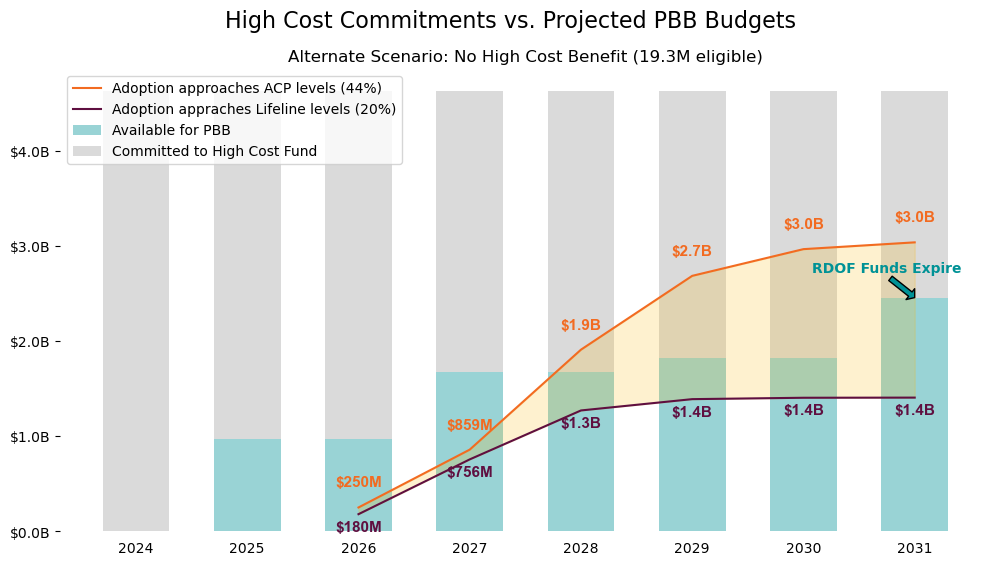

In [22]:
#create arrays to plot 19.3M/No High Cost Scenario
low = dfy_30['cost_S3'].tolist()
low = [None, None] + low

high = dfy_30['cost_S1'].to_list()
high = [None, None] + high

# Plotting
fig, ax1 = plt.subplots(figsize=(12,6))

# Stacked bar chart
bar_width = 0.6
bars1 = plt.bar(years, potential_reallocation, color='#009296',alpha=0.4, width=bar_width, label='Available for PBB')
bars2 = plt.bar(years, committed_funds, bottom=potential_reallocation, color='#4a4a4a',alpha=0.2, width=bar_width, label='Committed to High Cost Fund')

# Line charts
# Line charts, using np.nan for None values
scenario_1 = [np.nan if v is None else v for v in low]
scenario_2 = [np.nan if v is None else v for v in high]

ax1.plot(years, scenario_2, color='#F26B21', label='Adoption approaches ACP levels (44%)')
ax1.plot(years, scenario_1, color='#5F0F40', label='Adoption appraches Lifeline levels (20%)')


#fill in between lines
ax1.fill_between(years, scenario_1,  scenario_2, color = '#FDB913', alpha = 0.2)

# Add data labels
for i, txt in enumerate(scenario_1):
    if not np.isnan(txt):
        label = f"${txt/1e9:.1f}B" if txt >= 1e9 else f"${txt/1e6:.0f}M"
        ax1.annotate(label, (years[i], scenario_1[i]), textcoords="offset points", xytext=(0,-12), ha='center', 
                     fontsize=11, weight='bold', fontname = 'Arial', color = '#5F0F40')

for i, txt in enumerate(scenario_2):
    if not np.isnan(txt):
        label = f"${txt/1e9:.1f}B" if txt >= 1e9 else f"${txt/1e6:.0f}M"
        ax1.annotate(label, (years[i], scenario_2[i]), textcoords="offset points", xytext=(0,15), ha='center', 
                     fontsize=11, weight='bold', fontname = 'Arial', color = '#F26B21')


# Labels and title

# Define a function to format the y-axis labels
def billions(x, pos):
    # Format number in billions
    return f'${x * 1e-9:.1f}B'
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(billions))

plt.suptitle('High Cost Commitments vs. Projected PBB Budgets', size=16)
plt.title('Alternate Scenario: No High Cost Benefit (19.3M eligible)', size=12)
#plt.grid(axis='y')

#label years, but remove tick marks.
plt.xticks(years)
ax1.tick_params(axis='both', which='both', bottom=False)

plt.legend(loc='upper left', prop={'size': 10})
#remove frame
plt.box(False)

#add anntoations
ax1.annotate('RDOF Funds Expire',
             xy=(2031, potential_reallocation[years.index(2031)]),
             xytext=(-20,18),  # Offset the text above the point
             textcoords='offset points',
             ha='center', fontsize=10, color='#009296', fontweight='bold',
            arrowprops=dict(facecolor='#009296', width = 4, headwidth=10, headlength=4))
# Display the plot
plt.show()

### What if we assume PBB reaches rate of Adoption for Fixed Broadband/Fixed Wireless/Satellite?

In [14]:
##numbers from USAC
fixed_broadband = 10063453
fixed_wireless_or_sat = 188517
acp_eligibile = 52514583

fixed_ar = (fixed_broadband+fixed_wireless_or_sat)/acp_eligibile
fixed_ar

0.19522139212264145

In [20]:
dfm

,months,S1_adoption_rate,S1_enrolled_hh,S1_cost,S3_adoption_rate,S3_enrolled_hh,S3_cost,year
0,1.0,1.740934,3.364103e+05,1.112929e+07,0.876927,1.694534e+05,5.605941e+06,1.0
1,2.0,1.964501,3.796114e+05,1.255849e+07,1.047195,2.023553e+05,6.694418e+06,1.0
2,3.0,2.215273,4.280695e+05,1.416161e+07,1.248390,2.412333e+05,7.980600e+06,1.0
3,4.0,2.496156,4.823460e+05,1.595721e+07,1.485246,2.870022e+05,9.494750e+06,1.0
4,5.0,2.810258,5.430417e+05,1.796518e+07,1.762864,3.406479e+05,1.126948e+07,1.0
...,...,...,...,...,...,...,...,...
67,68.0,43.772749,8.458450e+06,2.798267e+08,20.218307,3.906895e+06,1.292498e+08,6.0
68,69.0,43.799554,8.463629e+06,2.799980e+08,20.218595,3.906950e+06,1.292517e+08,6.0
69,70.0,43.823210,8.468200e+06,2.801492e+08,20.218833,3.906997e+06,1.292532e+08,6.0
70,71.0,43.844084,8.472234e+06,2.802827e+08,20.219032,3.907035e+06,1.292545e+08,6.0


In [23]:
#creating S4, which scales down S1 so that adoption rate approaches 19.52%
dfm['S4_adoption_rate'] = dfm['S1_adoption_rate']*(fixed_ar*100 /dfy['S1_adoption_rate'].max())
dfm['S4_enrolled_hh'] = dfm['S4_adoption_rate']/100*19323551
dfm['S4_cost'] = dfm['S4_enrolled_hh']*(0.0685*75+0.9315*30)

dfy = dfm.groupby('year').agg({
    'S1_cost': 'sum',
    'S3_cost':'sum',
    'S4_cost':'sum',
    'S1_adoption_rate': 'max',
    'S1_enrolled_hh': 'max', 
    'S3_adoption_rate': 'max',
    'S3_enrolled_hh': 'max',
    'S4_adoption_rate':'max',
    'S4_enrolled_hh':'max'
}).reset_index()

# Display the resulting dfy
dfy

,year,S1_cost,S3_cost,S4_cost,S1_adoption_rate,S1_enrolled_hh,S3_adoption_rate,S3_enrolled_hh,S4_adoption_rate,S4_enrolled_hh
0,1.0,2.762130e+08,1.983591e+08,1.229357e+08,6.230392,1.203933e+06,5.262953,1.016989e+06,2.772997,5.358415e+05
1,2.0,9.473538e+08,8.340445e+08,4.216443e+08,18.847114,3.641932e+06,15.507028,2.996508e+06,8.388395,1.620936e+06
2,3.0,2.107229e+09,1.401915e+09,9.378769e+08,34.008223,6.571596e+06,19.583488,3.784225e+06,15.136238,2.924859e+06
3,4.0,2.963696e+09,1.533098e+09,1.319069e+09,41.326945,7.985833e+06,20.149961,3.893688e+06,18.393624,3.554301e+06
4,5.0,3.273548e+09,1.549172e+09,1.456977e+09,43.382264,8.382994e+06,20.212487,3.905770e+06,19.308397,3.731068e+06
5,6.0,3.352303e+09,1.550919e+09,1.492029e+09,43.862501,8.475793e+06,20.219196,3.907067e+06,19.522139,3.772371e+06


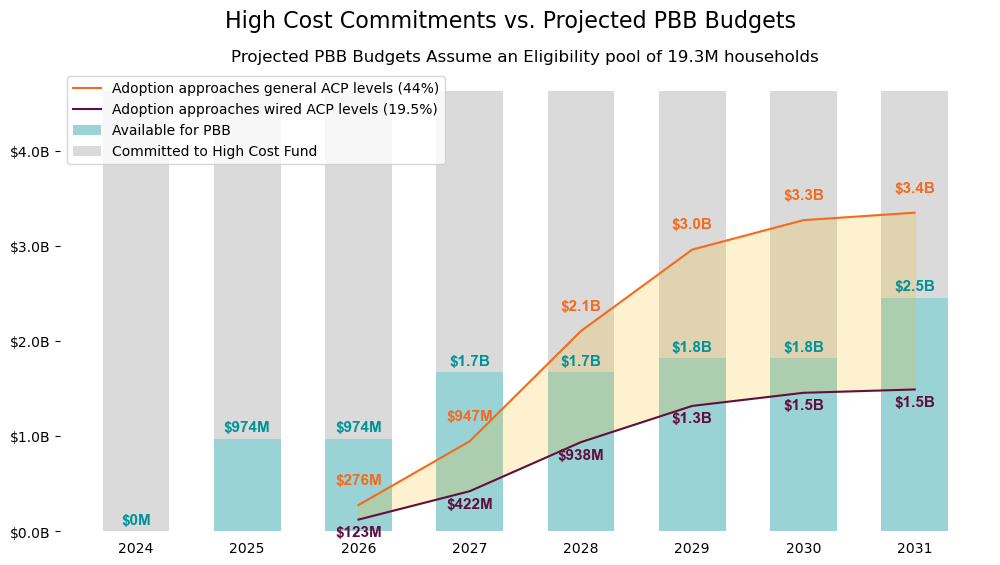

In [25]:
#replace low estimate with S4
S4_estimate = dfy['S4_cost'].to_list()
S4_estimate = [None, None] + S4_estimate

# Plotting
fig, ax1 = plt.subplots(figsize=(12,6))

# Stacked bar chart
bar_width = 0.6
bars1 = plt.bar(years, potential_reallocation, color='#009296',alpha=0.4, width=bar_width, label='Available for PBB')
bars2 = plt.bar(years, committed_funds, bottom=potential_reallocation, color='#4a4a4a',alpha=0.2, width=bar_width, label='Committed to High Cost Fund')

# Line charts
# Line charts, using np.nan for None values
pbb_scenario_1 = [np.nan if v is None else v for v in S4_estimate]
pbb_scenario_2 = [np.nan if v is None else v for v in high_estimate]

ax1.plot(years, pbb_scenario_2, color='#F26B21', label='Adoption approaches general ACP levels (44%)')
ax1.plot(years, pbb_scenario_1, color='#5F0F40', label='Adoption approaches wired ACP levels (19.5%)')


#fill in between lines
ax1.fill_between(years, pbb_scenario_1,  pbb_scenario_2, color = '#FDB913', alpha = 0.2)

# Add data labels
for i, txt in enumerate(pbb_scenario_1):
    if not np.isnan(txt):
        label = f"${txt/1e9:.1f}B" if txt >= 1e9 else f"${txt/1e6:.0f}M"
        ax1.annotate(label, (years[i], pbb_scenario_1[i]), textcoords="offset points", xytext=(0,-12), ha='center', 
                     fontsize=11, weight='bold', fontname = 'Arial', color = '#5F0F40')

for i, txt in enumerate(pbb_scenario_2):
    if not np.isnan(txt):
        label = f"${txt/1e9:.1f}B" if txt >= 1e9 else f"${txt/1e6:.0f}M"
        ax1.annotate(label, (years[i], pbb_scenario_2[i]), textcoords="offset points", xytext=(0,15), ha='center', 
                     fontsize=11, weight='bold', fontname = 'Arial', color = '#F26B21')

for i, txt in enumerate(potential_reallocation):
    if not np.isnan(txt):
        label = f"${txt/1e9:.1f}B" if txt >= 1e9 else f"${txt/1e6:.0f}M"
        ax1.annotate(label, (years[i], potential_reallocation[i]), textcoords="offset points", xytext=(0,5), ha='center', 
                     fontsize=11, weight='bold', fontname = 'Arial', color = '#009296')

# Labels and title

# Define a function to format the y-axis labels
def billions(x, pos):
    # Format number in billions
    return f'${x * 1e-9:.1f}B'
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(billions))

plt.suptitle('High Cost Commitments vs. Projected PBB Budgets', size=16)
plt.title('Projected PBB Budgets Assume an Eligibility pool of 19.3M households', size=12)
#plt.grid(axis='y')

#label years, but remove tick marks.
plt.xticks(years)
ax1.tick_params(axis='both', which='both', bottom=False)

plt.legend(loc='upper left', prop={'size': 10})
#remove frame
plt.box(False)

# Display the plot
plt.show()